In [ ]:
#Import Library

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Read Dataset

In [4]:
customers_df=pd.read_csv('Customers.csv')
products_df=pd.read_csv('Products.csv')
transactions_df=pd.read_csv('Transactions.csv')

In [5]:
customers_df.head()
products_df.head()
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [49]:
customers_df.tail()
products_df.tail()
transactions_df.tail()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
995,495,117,36,856,1,1,459.86
996,758,58,36,448,3,3,459.86
997,921,17,36,282,4,4,459.86
998,958,114,36,783,2,2,459.86
999,991,23,36,317,1,1,459.86


In [ ]:
#sanity check of data

In [50]:
customers_df.shape
products_df.shape
transactions_df.shape

(1000, 7)

In [52]:
customers_df.describe()
products_df.describe()
transactions_df.describe()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.500000,100.192000,49.574000,499.500000,2.537000,2.537000,272.55407
std,288.819436,57.187162,27.723981,288.819436,1.117981,1.117981,140.73639
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,16.08000
25%,249.750000,50.000000,26.000000,249.750000,2.000000,2.000000,147.95000
50%,499.500000,101.000000,50.000000,499.500000,3.000000,3.000000,299.93000
75%,749.250000,152.000000,73.000000,749.250000,4.000000,4.000000,404.40000
max,999.000000,198.000000,99.000000,999.000000,4.000000,4.000000,497.76000


In [ ]:
#Check Null values

In [6]:
customers_df.info()
products_df.info()
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


In [ ]:
#Exploring the Data

In [ ]:
#preprocessing

In [18]:
customers_df_columns=list(customers_df.select_dtypes('object').columns)
products_df_columns=list(products_df.select_dtypes('object').columns)
transactions_df_columns=list(transactions_df.select_dtypes('object').columns)

In [19]:
df_columns

['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate']

In [20]:
from sklearn.preprocessing import LabelEncoder
Encode=LabelEncoder()
for column_name in customers_df_columns:
    customers_df[column_name] = Encode.fit_transform(customers_df[column_name])
  
for column_name in products_df_columns:
    products_df[column_name] = Encode.fit_transform(products_df[column_name])

for column_name in transactions_df_columns:
    transactions_df[column_name] = Encode.fit_transform(transactions_df[column_name])

In [23]:
customers_df
products_df
transactions_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,0,197,66,680,1,300.68,300.68
1,111,145,66,428,1,300.68,300.68
2,165,126,66,329,1,300.68,300.68
3,271,86,66,253,2,601.36,300.68
4,362,69,66,240,3,902.04,300.68
...,...,...,...,...,...,...,...
995,495,117,36,856,1,459.86,459.86
996,758,58,36,448,3,1379.58,459.86
997,921,17,36,282,4,1839.44,459.86
998,958,114,36,783,2,919.72,459.86


In [24]:
customers_df.dtypes
products_df.dtypes
transactions_df.dtypes

TransactionID        int64
CustomerID           int64
ProductID            int64
TransactionDate      int64
Quantity             int64
TotalValue         float64
Price              float64
dtype: object

In [ ]:
#Null value Handling

In [7]:
customers_df.isnull().sum()
products_df.isnull().sum()
transactions_df.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [ ]:
#Business insights

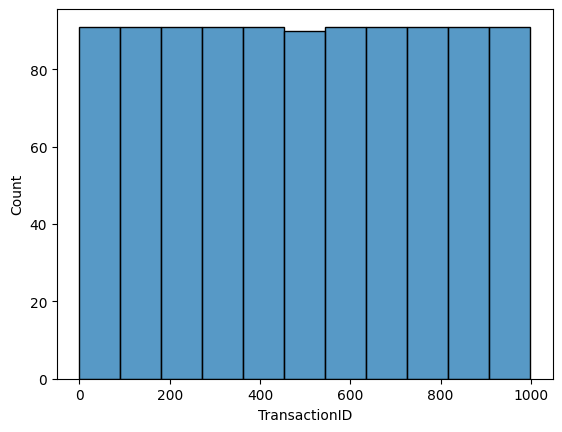

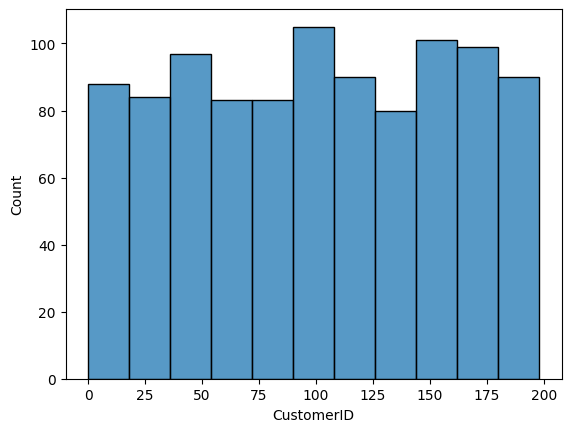

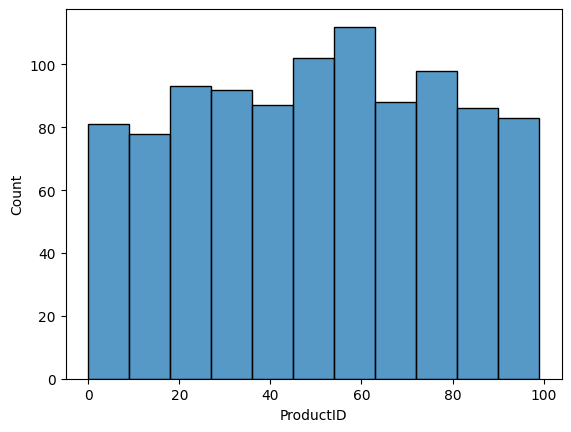

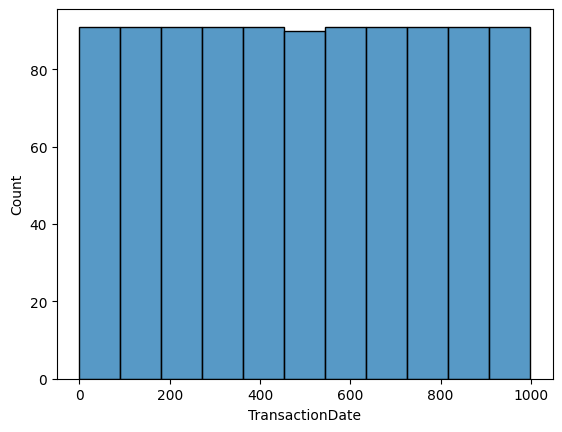

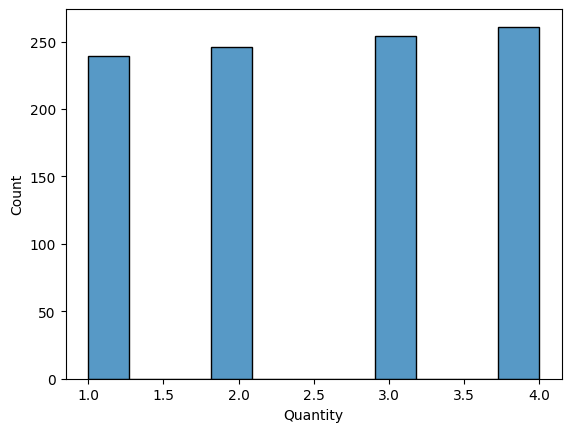

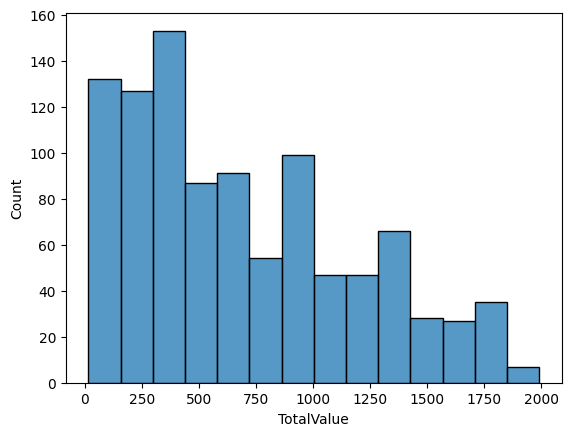

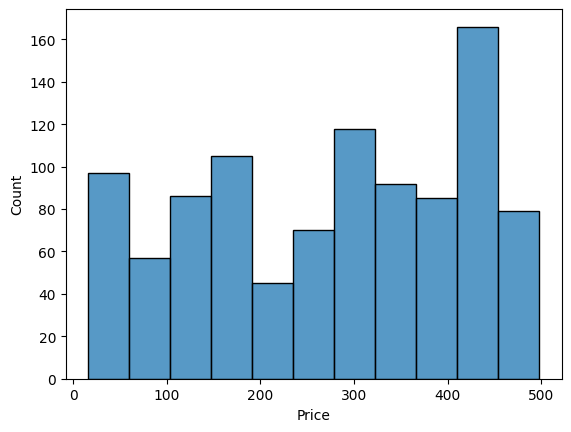

In [35]:
for i in transactions_df.select_dtypes(include=np.number).columns:
  sns.histplot(x=i,data=transactions_df)
  plt.show()

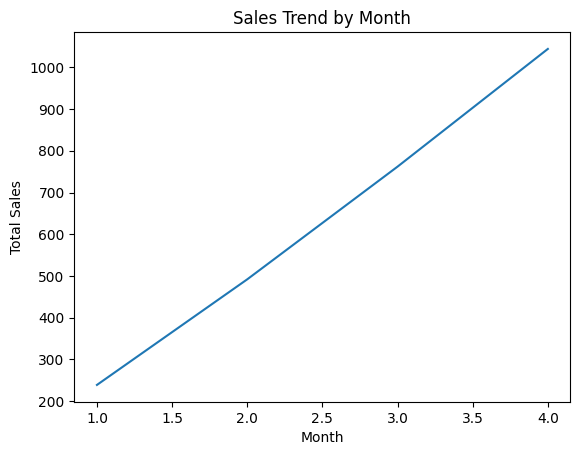

In [36]:
transactions_df['TotalValue'] = transactions_df['Quantity']

monthly_sales = transactions_df.groupby('TotalValue')['Quantity'].sum()

sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title("Sales Trend by Month")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

In [ ]:
Business Insight: Sales might be higher month by month. Focus your marketing efforts, discounts, and promotions around these months to boost sales upcoming months.

<Axes: xlabel='TotalValue', ylabel='Count'>

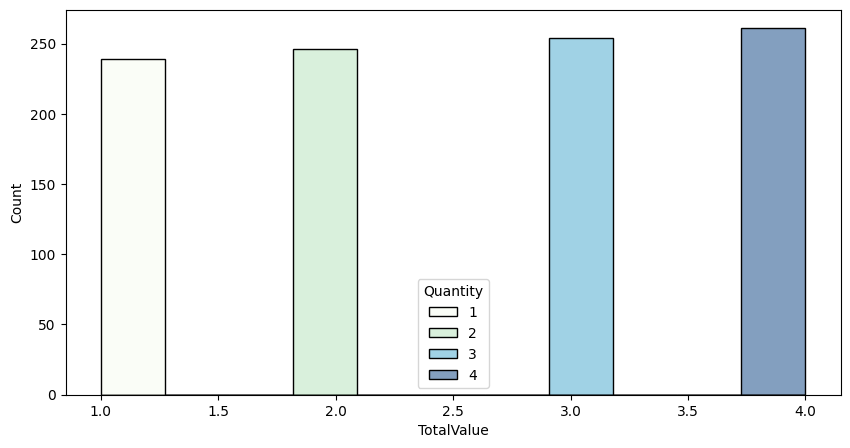

In [38]:
plt.figure(figsize=(10,5))
sns.histplot(x='TotalValue',hue='Quantity',data=transactions_df,palette='GnBu')

In [ ]:
#Correlation Heatmap

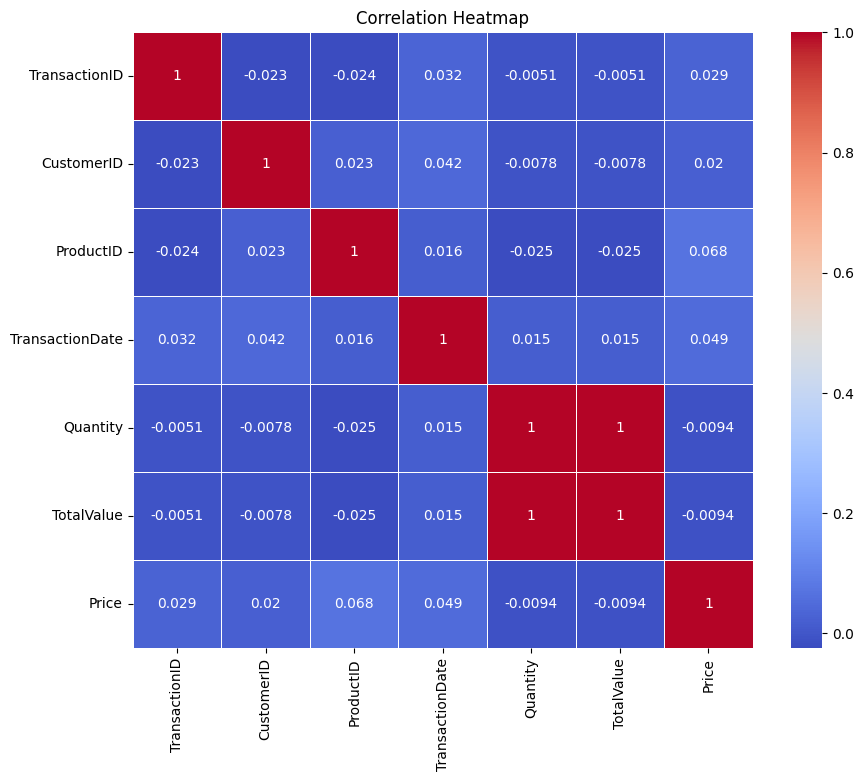

In [48]:
corr_matrix = transactions_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<Axes: >

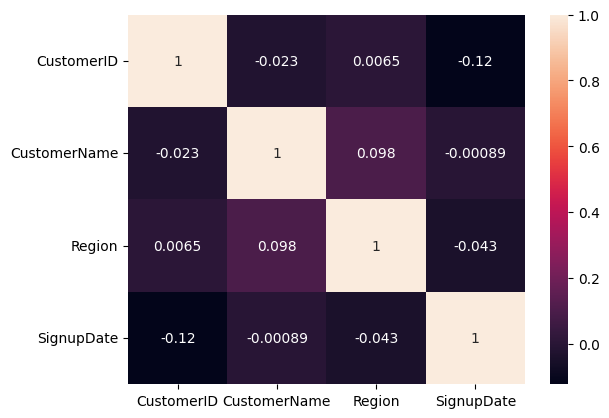

In [45]:
customers_df.select_dtypes(include=np.number).columns
sns.heatmap(customers_df.corr(), annot=True)

<Axes: >

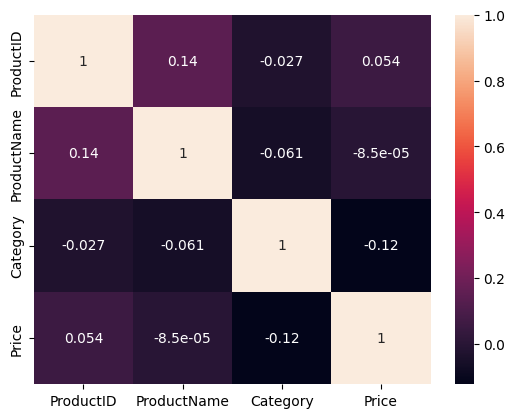

In [46]:
products_df.select_dtypes(include=np.number).columns
sns.heatmap(products_df.corr(), annot=True)

<Axes: >

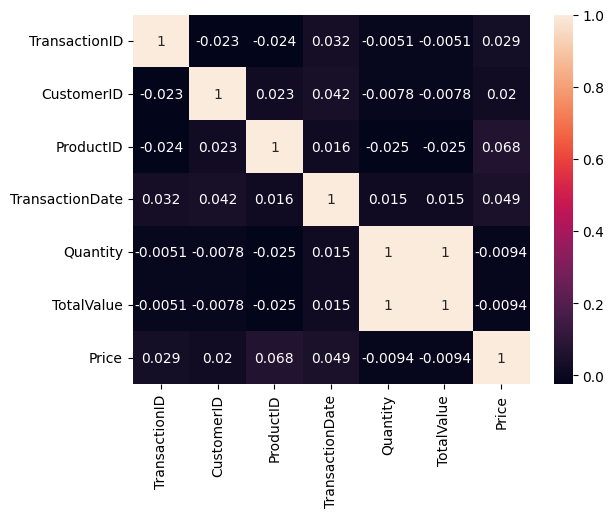

In [47]:
transactions_df.select_dtypes(include=np.number).columns
sns.heatmap(transactions_df.corr(), annot=True)

In [ ]:
#Clean the duplicates

In [51]:
customers_df.drop_duplicates()
products_df.drop_duplicates()
transactions_df.drop_duplicates()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,0,197,66,680,1,1,300.68
1,111,145,66,428,1,1,300.68
2,165,126,66,329,1,1,300.68
3,271,86,66,253,2,2,300.68
4,362,69,66,240,3,3,300.68
...,...,...,...,...,...,...,...
995,495,117,36,856,1,1,459.86
996,758,58,36,448,3,3,459.86
997,921,17,36,282,4,4,459.86
998,958,114,36,783,2,2,459.86


In [ ]:
#Encoding of data

In [53]:
pd.get_dummies(data=transactions_df, columns=["ProductID", "CustomerID"], drop_first=True)

,TransactionID,TransactionDate,Quantity,TotalValue,Price,ProductID_1,ProductID_2,ProductID_3,ProductID_4,ProductID_5,...,CustomerID_189,CustomerID_190,CustomerID_191,CustomerID_192,CustomerID_193,CustomerID_194,CustomerID_195,CustomerID_196,CustomerID_197,CustomerID_198
0,0,680,1,1,300.68,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,111,428,1,1,300.68,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,165,329,1,1,300.68,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,271,253,2,2,300.68,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,362,240,3,3,300.68,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,495,856,1,1,459.86,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,758,448,3,3,459.86,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,921,282,4,4,459.86,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,958,783,2,2,459.86,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
